In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

<br></br>
<h3>Data Visualization</h3>

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255
)

In [3]:
training_data = datagen.flow_from_directory(
      './Datasets/bears_ws/bears/training',
    target_size=(256, 256),
    batch_size=10,
    class_mode='categorical',
    classes=['grizzly', 'panda', 'polar']
)

Found 718 images belonging to 3 classes.


In [4]:
print(training_data.image_shape)

(256, 256, 3)


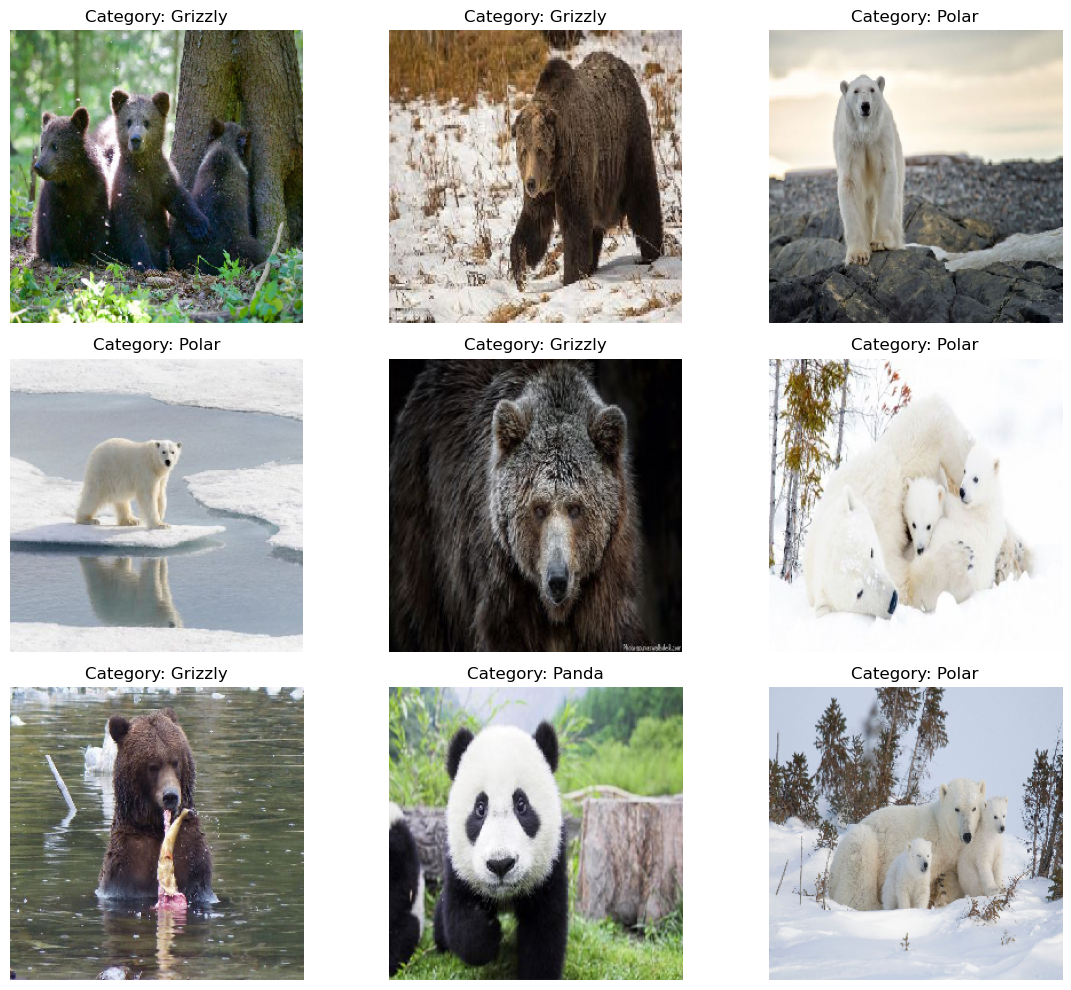

In [5]:
rows = 3
cols = 3

plt.figure(figsize=(12, 10))

images, labels = next(training_data)

categories = ['Grizzly', 'Panda', 'Polar']

for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])  
    category_index = np.argmax(labels[i])
    plt.title(f'Category: {categories[category_index]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
#loading test and validation data individually

test_data = datagen.flow_from_directory(
      './Datasets/bears_ws/bears/test',
    target_size=(256, 256),
    batch_size=10,
    class_mode='categorical',
    classes=['grizzly', 'panda', 'polar']
)

validation_data = datagen.flow_from_directory(
      './Datasets/bears_ws/bears/validation',
    target_size=(256, 256),
    batch_size=10,
    class_mode='categorical',
    classes=['grizzly', 'panda', 'polar']
)

Found 240 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


<br></br>
<h3>Creating a training Model</h3>

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall

<h5>Let's assume and try below layers and parameters are best fit for the model to get the best accuracy:</h5>
<ul>
    <li>3 convolutional layers with 64, 32 and 16 filters, each using a relu activation function</li>
    <li>3 MaxPools that follow each of the convolutional layers</li>
    <li>2 dense layers with 10 and 3 neurons using a relu and softmax activation function, respectively</li>
</ul>

In [8]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=training_data.image_shape),
    MaxPooling2D(5, 5),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(5, 5),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(5, 5),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 16)         0

In [ ]:
!pip install pydot

In [ ]:
!pip install graphviz

In [ ]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, show_layer_names = True, show_shapes = True)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    './weights/best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1
)

In [12]:
history = model.fit(
    training_data,
    epochs=50,
    validation_data=validation_data,
    batch_size = 32,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
72/72 [==============================] - ETA: 0s - loss: 1.0495 - accuracy: 0.4234 - precision: 0.7692 - recall: 0.0139
Epoch 1: val_loss improved from inf to 0.88252, saving model to ./weights\best_model.h5
72/72 [==============================] - 42s 543ms/step - loss: 1.0495 - accuracy: 0.4234 - precision: 0.7692 - recall: 0.0139 - val_loss: 0.8825 - val_accuracy: 0.6958 - val_precision: 0.9286 - val_recall: 0.1625
Epoch 2/50
72/72 [==============================] - ETA: 0s - loss: 0.7071 - accuracy: 0.7173 - precision: 0.7968 - recall: 0.5571
Epoch 2: val_loss improved from 0.88252 to 0.55189, saving model to ./weights\best_model.h5
72/72 [==============================] - 38s 530ms/step - loss: 0.7071 - accuracy: 0.7173 - precision: 0.7968 - recall: 0.5571 - val_loss: 0.5519 - val_accuracy: 0.8083 - val_precision: 0.8545 - val_recall: 0.7583
Epoch 3/50
72/72 [==============================] - ETA: 0s - loss: 0.4714 - accuracy: 0.8259 - precision: 0.8561 - recall: 0.7869

Epoch 21/50
72/72 [==============================] - ETA: 0s - loss: 0.1084 - accuracy: 0.9624 - precision: 0.9677 - recall: 0.9582
Epoch 21: val_loss did not improve from 0.27201
72/72 [==============================] - 46s 639ms/step - loss: 0.1084 - accuracy: 0.9624 - precision: 0.9677 - recall: 0.9582 - val_loss: 0.2790 - val_accuracy: 0.9250 - val_precision: 0.9364 - val_recall: 0.9208
Epoch 22/50
72/72 [==============================] - ETA: 0s - loss: 0.1275 - accuracy: 0.9554 - precision: 0.9580 - recall: 0.9526
Epoch 22: val_loss did not improve from 0.27201
72/72 [==============================] - 47s 651ms/step - loss: 0.1275 - accuracy: 0.9554 - precision: 0.9580 - recall: 0.9526 - val_loss: 0.2794 - val_accuracy: 0.9083 - val_precision: 0.9160 - val_recall: 0.9083
Epoch 23/50
72/72 [==============================] - ETA: 0s - loss: 0.1056 - accuracy: 0.9680 - precision: 0.9693 - recall: 0.9680
Epoch 23: val_loss did not improve from 0.27201
72/72 [=========================

<br></br>
<h4>Let's plot the accuracies and losses</h4>

In [14]:
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
Train_Precision = history.history['precision'][-1]
Validation_prec = history.history['val_precision'][-1]
Train_Recall = history.history['recall'][-1]
Validation_Rec = history.history['val_recall'][-1]

print(f'Validation_Accuracy is {validation_acc[-1]:.2f}')
print(f'Validation_Loss is {validation_loss[-1]:.2f}')
print(f'Validation_Precision is {Validation_prec:.2f}')
print(f'Validation_recall is {Validation_Rec:.2f}')

Validation_Accuracy is 0.92
Validation_Loss is 0.31
Validation_Precision is 0.92
Validation_recall is 0.92


<p>Alright, I got some good results on validation set with the first model.

Text(0.5, 1.0, 'Training and Validation Recall')

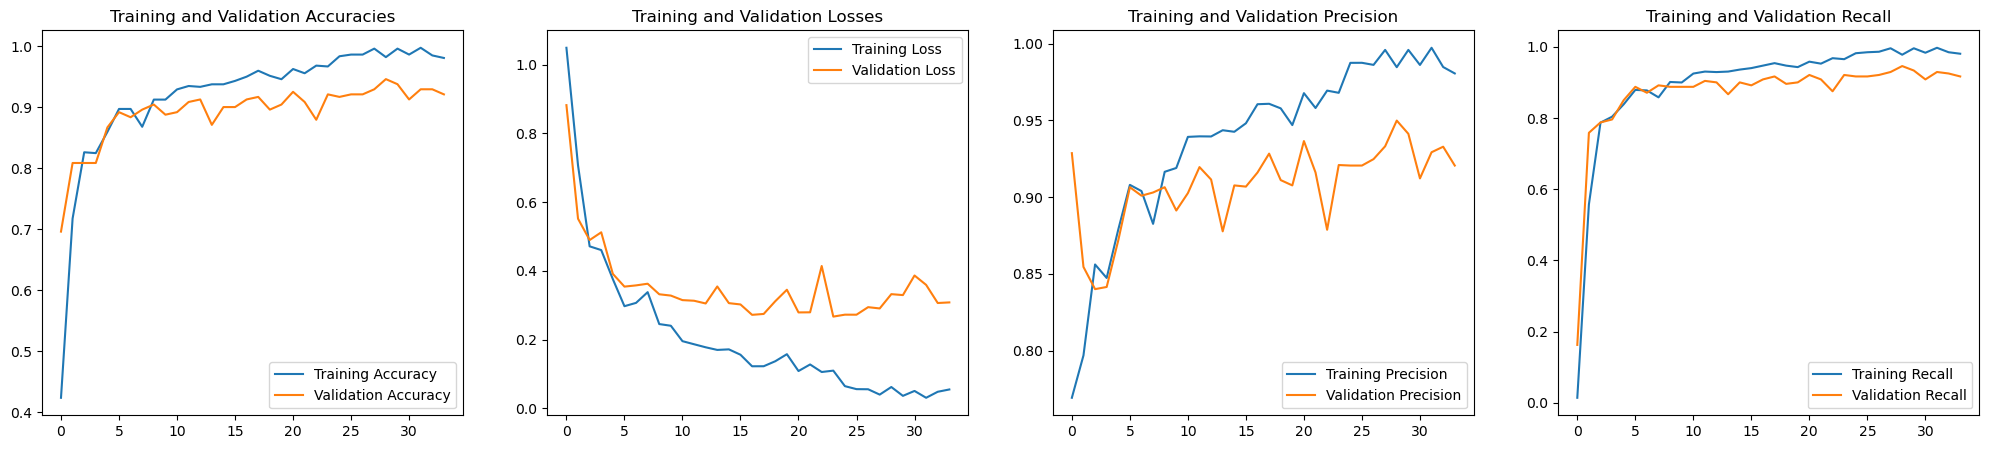

In [15]:
epochs_range = range(len(training_acc))

plt.figure(figsize = (25,5))

plt.subplot(1,4,1)
plt.plot(epochs_range, training_acc, label = 'Training Accuracy')
plt.plot(epochs_range, validation_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracies')

plt.subplot(1, 4, 2)
plt.plot(epochs_range, training_loss, label = 'Training Loss')
plt.plot(epochs_range, validation_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Losses')

plt.subplot(1,4,3)
plt.plot(epochs_range, history.history['precision'], label = 'Training Precision')
plt.plot(epochs_range, history.history['val_precision'], label = 'Validation Precision')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Precision')

plt.subplot(1,4,4)
plt.plot(epochs_range, history.history['recall'], label = 'Training Recall')
plt.plot(epochs_range, history.history['val_recall'], label = 'Validation Recall')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Recall')

<h4>Let's decrease some layers to see how our model is performing:</h4>

In [16]:
model_1 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=training_data.image_shape),
    MaxPooling2D(5, 5),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(5, 5),
#     Conv2D(16, (3, 3), activation='relu'),
#     MaxPooling2D(5, 5),
    Flatten(),
    Dense(3, activation='softmax')
])

In [17]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2592)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                

In [18]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    './weights/best_model1.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1
)

In [20]:
history_1 = model_1.fit(
    training_data,
    epochs=50,
    validation_data=validation_data,
    batch_size = 32,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
72/72 [==============================] - ETA: 0s - loss: 0.8626 - accuracy: 0.5933 - precision_1: 0.7697 - recall_1: 0.3677
Epoch 1: val_loss improved from inf to 0.86288, saving model to ./weights\best_model1.h5
72/72 [==============================] - 52s 701ms/step - loss: 0.8626 - accuracy: 0.5933 - precision_1: 0.7697 - recall_1: 0.3677 - val_loss: 0.8629 - val_accuracy: 0.5375 - val_precision_1: 0.5640 - val_recall_1: 0.4958
Epoch 2/50
72/72 [==============================] - ETA: 0s - loss: 0.5217 - accuracy: 0.7925 - precision_1: 0.8344 - recall_1: 0.7437
Epoch 2: val_loss improved from 0.86288 to 0.52240, saving model to ./weights\best_model1.h5
72/72 [==============================] - 39s 536ms/step - loss: 0.5217 - accuracy: 0.7925 - precision_1: 0.8344 - recall_1: 0.7437 - val_loss: 0.5224 - val_accuracy: 0.8333 - val_precision_1: 0.8465 - val_recall_1: 0.8042
Epoch 3/50
72/72 [==============================] - ETA: 0s - loss: 0.3571 - accuracy: 0.8663 - precisio

In [21]:
training_acc = history_1.history['accuracy']
validation_acc = history_1.history['val_accuracy']
training_loss = history_1.history['loss']
validation_loss = history_1.history['val_loss']
Train_Precision = history_1.history['precision_1'][-1]
Validation_prec = history_1.history['val_precision_1'][-1]
Train_Recall = history_1.history['recall_1'][-1]
Validation_Rec = history_1.history['val_recall_1'][-1]

print(f'Validation_Accuracy is {validation_acc[-1]:.2f}')
print(f'Validation_Loss is {validation_loss[-1]:.2f}')
print(f'Validation_Precision is {Validation_prec:.2f}')
print(f'Validation_recall is {Validation_Rec:.2f}')

Validation_Accuracy is 0.89
Validation_Loss is 0.43
Validation_Precision is 0.89
Validation_recall is 0.88


Huh!, We are seeing little decline in metrics, loss is also increased.

Let's Plot them and see how the learning curves are.

Text(0.5, 1.0, 'Training and Validation Recall')

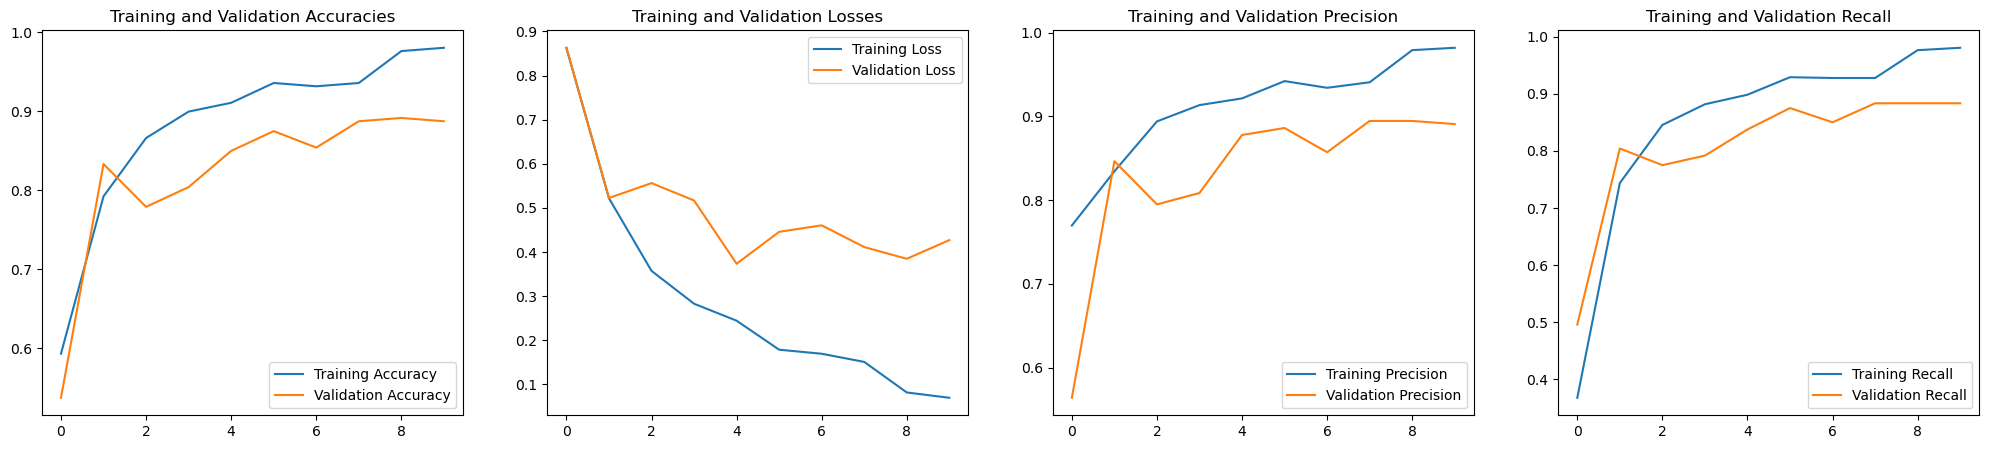

In [22]:
epochs_range = range(len(training_acc))

plt.figure(figsize = (25,5))

plt.subplot(1,4,1)
plt.plot(epochs_range, training_acc, label = 'Training Accuracy')
plt.plot(epochs_range, validation_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracies')

plt.subplot(1, 4, 2)
plt.plot(epochs_range, training_loss, label = 'Training Loss')
plt.plot(epochs_range, validation_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Losses')

plt.subplot(1,4,3)
plt.plot(epochs_range, history_1.history['precision_1'], label = 'Training Precision')
plt.plot(epochs_range, history_1.history['val_precision_1'], label = 'Validation Precision')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Precision')

plt.subplot(1,4,4)
plt.plot(epochs_range, history_1.history['recall_1'], label = 'Training Recall')
plt.plot(epochs_range, history_1.history['val_recall_1'], label = 'Validation Recall')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Recall')

<h4>Let's increase some layers and see out the model's performance: </h4>

Let's add one more Dense layer.

In [23]:
model_2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=training_data.image_shape),
    MaxPooling2D(5, 5),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(5, 5),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(5, 5),
    Flatten(),
    Dense(16, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(3, activation='softmax')
])

In [24]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 1, 1, 16)        

In [25]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    './weights/best_model2.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1
)

In [27]:
history_2 = model_2.fit(
    training_data,
    epochs=50,
    validation_data=validation_data,
    batch_size = 32,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
72/72 [==============================] - ETA: 0s - loss: 1.0418 - accuracy: 0.4596 - precision_2: 0.8841 - recall_2: 0.0850
Epoch 1: val_loss improved from inf to 0.88788, saving model to ./weights\best_model2.h5
72/72 [==============================] - 42s 542ms/step - loss: 1.0418 - accuracy: 0.4596 - precision_2: 0.8841 - recall_2: 0.0850 - val_loss: 0.8879 - val_accuracy: 0.6000 - val_precision_2: 0.9223 - val_recall_2: 0.3958
Epoch 2/50
72/72 [==============================] - ETA: 0s - loss: 0.7787 - accuracy: 0.6295 - precision_2: 0.7574 - recall_2: 0.5000
Epoch 2: val_loss improved from 0.88788 to 0.67559, saving model to ./weights\best_model2.h5
72/72 [==============================] - 39s 537ms/step - loss: 0.7787 - accuracy: 0.6295 - precision_2: 0.7574 - recall_2: 0.5000 - val_loss: 0.6756 - val_accuracy: 0.6458 - val_precision_2: 0.7802 - val_recall_2: 0.5917
Epoch 3/50
72/72 [==============================] - ETA: 0s - loss: 0.5540 - accuracy: 0.7883 - precisio

72/72 [==============================] - ETA: 0s - loss: 0.0742 - accuracy: 0.9805 - precision_2: 0.9805 - recall_2: 0.9805
Epoch 20: val_loss did not improve from 0.31590
72/72 [==============================] - 35s 491ms/step - loss: 0.0742 - accuracy: 0.9805 - precision_2: 0.9805 - recall_2: 0.9805 - val_loss: 0.3532 - val_accuracy: 0.9125 - val_precision_2: 0.9163 - val_recall_2: 0.9125
Epoch 21/50
72/72 [==============================] - ETA: 0s - loss: 0.0669 - accuracy: 0.9819 - precision_2: 0.9819 - recall_2: 0.9819
Epoch 21: val_loss did not improve from 0.31590
72/72 [==============================] - 35s 481ms/step - loss: 0.0669 - accuracy: 0.9819 - precision_2: 0.9819 - recall_2: 0.9819 - val_loss: 0.3644 - val_accuracy: 0.9000 - val_precision_2: 0.9000 - val_recall_2: 0.9000
Epoch 22/50
72/72 [==============================] - ETA: 0s - loss: 0.0598 - accuracy: 0.9833 - precision_2: 0.9833 - recall_2: 0.9833
Epoch 22: val_loss did not improve from 0.31590
72/72 [=========

Epoch 40/50
72/72 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9958 - precision_2: 0.9958 - recall_2: 0.9958
Epoch 40: val_loss did not improve from 0.27547
72/72 [==============================] - 35s 479ms/step - loss: 0.0134 - accuracy: 0.9958 - precision_2: 0.9958 - recall_2: 0.9958 - val_loss: 0.3735 - val_accuracy: 0.9042 - val_precision_2: 0.9079 - val_recall_2: 0.9042
Epoch 41/50
72/72 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9986 - precision_2: 0.9986 - recall_2: 0.9986Restoring model weights from the end of the best epoch: 31.

Epoch 41: val_loss did not improve from 0.27547
72/72 [==============================] - 74s 1s/step - loss: 0.0090 - accuracy: 0.9986 - precision_2: 0.9986 - recall_2: 0.9986 - val_loss: 0.3914 - val_accuracy: 0.9083 - val_precision_2: 0.9083 - val_recall_2: 0.9083
Epoch 41: early stopping


In [28]:
training_acc = history_2.history['accuracy']
validation_acc = history_2.history['val_accuracy']
training_loss = history_2.history['loss']
validation_loss = history_2.history['val_loss']
Train_Precision = history_2.history['precision_2'][-1]
Validation_prec = history_2.history['val_precision_2'][-1]
Train_Recall = history_2.history['recall_2'][-1]
Validation_Rec = history_2.history['val_recall_2'][-1]

print(f'Validation_Accuracy is {validation_acc[-1]:.2f}')
print(f'Validation_Loss is {validation_loss[-1]:.2f}')
print(f'Validation_Precision is {Validation_prec:.2f}')
print(f'Validation_recall is {Validation_Rec:.2f}')

Validation_Accuracy is 0.91
Validation_Loss is 0.39
Validation_Precision is 0.91
Validation_recall is 0.91


<p>Okay, We are seeing slight increase in metrics but it is still below our first model</p>

Text(0.5, 1.0, 'Training and Validation Recall')

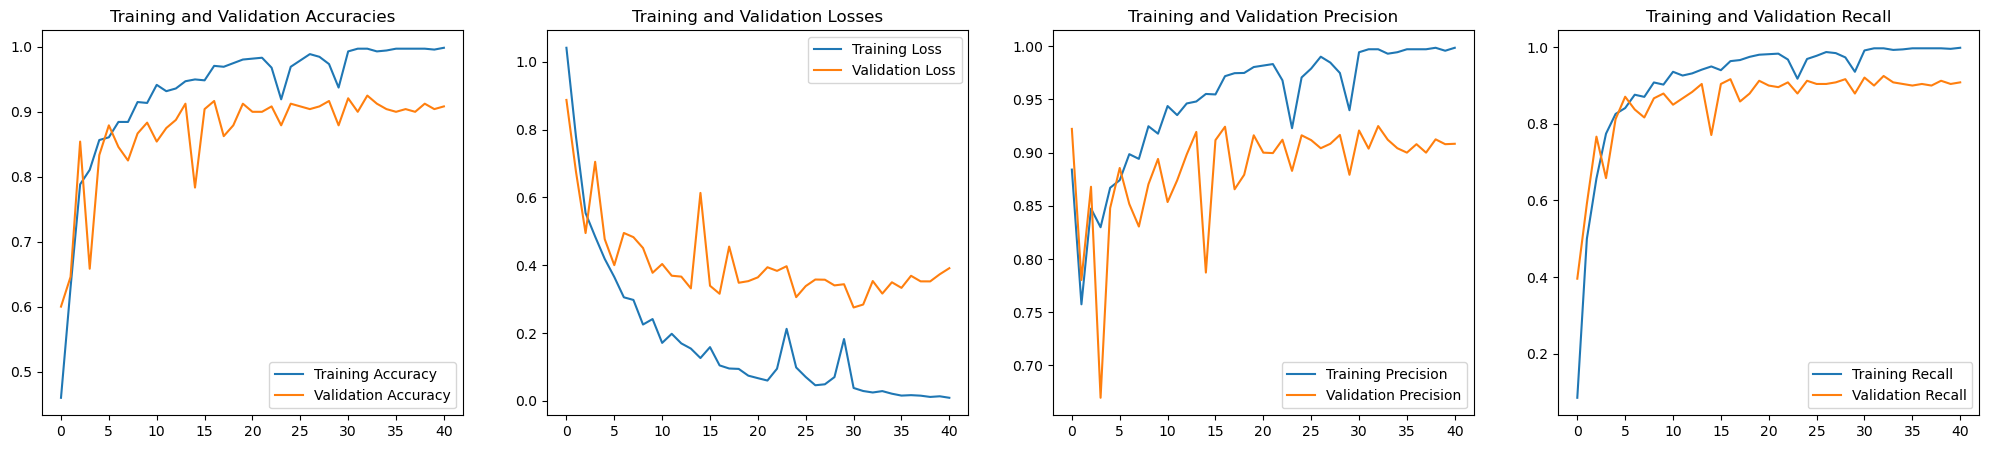

In [29]:
epochs_range = range(len(training_acc))

plt.figure(figsize = (25,5))

plt.subplot(1,4,1)
plt.plot(epochs_range, training_acc, label = 'Training Accuracy')
plt.plot(epochs_range, validation_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracies')

plt.subplot(1, 4, 2)
plt.plot(epochs_range, training_loss, label = 'Training Loss')
plt.plot(epochs_range, validation_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Losses')

plt.subplot(1,4,3)
plt.plot(epochs_range, history_2.history['precision_2'], label = 'Training Precision')
plt.plot(epochs_range, history_2.history['val_precision_2'], label = 'Validation Precision')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Precision')

plt.subplot(1,4,4)
plt.plot(epochs_range, history_2.history['recall_2'], label = 'Training Recall')
plt.plot(epochs_range, history_2.history['val_recall_2'], label = 'Validation Recall')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Recall')

<h4>Let's decrease filters and see how the model gonna perform:</h4>

In [30]:
model_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=training_data.image_shape),
    MaxPooling2D(5, 5),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(5, 5),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D(5, 5),
    Flatten(),
    Dense(8, activation = 'relu'),
    Dense(3, activation='softmax')
])

In [31]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 9, 9, 16)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 8)           1160      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 1, 1, 8)         

In [32]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    './weights/best_model3.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1
)

In [34]:
history_3 = model_3.fit(
    training_data,
    epochs=50,
    validation_data=validation_data,
    batch_size = 32,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
72/72 [==============================] - ETA: 0s - loss: 0.9638 - accuracy: 0.5042 - precision_3: 0.7656 - recall_3: 0.2047
Epoch 1: val_loss improved from inf to 0.84209, saving model to ./weights\best_model3.h5
72/72 [==============================] - 42s 522ms/step - loss: 0.9638 - accuracy: 0.5042 - precision_3: 0.7656 - recall_3: 0.2047 - val_loss: 0.8421 - val_accuracy: 0.5500 - val_precision_3: 0.6867 - val_recall_3: 0.4292
Epoch 2/50
72/72 [==============================] - ETA: 0s - loss: 0.7296 - accuracy: 0.6435 - precision_3: 0.7641 - recall_3: 0.5097
Epoch 2: val_loss improved from 0.84209 to 0.71033, saving model to ./weights\best_model3.h5
72/72 [==============================] - 19s 262ms/step - loss: 0.7296 - accuracy: 0.6435 - precision_3: 0.7641 - recall_3: 0.5097 - val_loss: 0.7103 - val_accuracy: 0.7708 - val_precision_3: 0.8643 - val_recall_3: 0.5042
Epoch 3/50
72/72 [==============================] - ETA: 0s - loss: 0.6385 - accuracy: 0.7423 - precisio

Epoch 20/50
72/72 [==============================] - ETA: 0s - loss: 0.1171 - accuracy: 0.9694 - precision_3: 0.9693 - recall_3: 0.9666
Epoch 20: val_loss did not improve from 0.34108
72/72 [==============================] - 22s 301ms/step - loss: 0.1171 - accuracy: 0.9694 - precision_3: 0.9693 - recall_3: 0.9666 - val_loss: 0.3481 - val_accuracy: 0.8958 - val_precision_3: 0.8996 - val_recall_3: 0.8958
Epoch 21/50
72/72 [==============================] - ETA: 0s - loss: 0.0990 - accuracy: 0.9735 - precision_3: 0.9748 - recall_3: 0.9708
Epoch 21: val_loss did not improve from 0.34108
72/72 [==============================] - 22s 304ms/step - loss: 0.0990 - accuracy: 0.9735 - precision_3: 0.9748 - recall_3: 0.9708 - val_loss: 0.3418 - val_accuracy: 0.9000 - val_precision_3: 0.9153 - val_recall_3: 0.9000
Epoch 22/50
72/72 [==============================] - ETA: 0s - loss: 0.1351 - accuracy: 0.9485 - precision_3: 0.9523 - recall_3: 0.9457
Epoch 22: val_loss did not improve from 0.34108
72/7

In [35]:
training_acc = history_3.history['accuracy']
validation_acc = history_3.history['val_accuracy']
training_loss = history_3.history['loss']
validation_loss = history_3.history['val_loss']
Train_Precision = history_3.history['precision_3'][-1]
Validation_prec = history_3.history['val_precision_3'][-1]
Train_Recall = history_3.history['recall_3'][-1]
Validation_Rec = history_3.history['val_recall_3'][-1]

print(f'Validation_Accuracy is {validation_acc[-1]:.2f}')
print(f'Validation_Loss is {validation_loss[-1]:.2f}')
print(f'Validation_Precision is {Validation_prec:.2f}')
print(f'Validation_recall is {Validation_Rec:.2f}')

Validation_Accuracy is 0.90
Validation_Loss is 0.40
Validation_Precision is 0.91
Validation_recall is 0.90


<p>Seeing not much difference though but yielding some good results</p>

Text(0.5, 1.0, 'Training and Validation Recall')

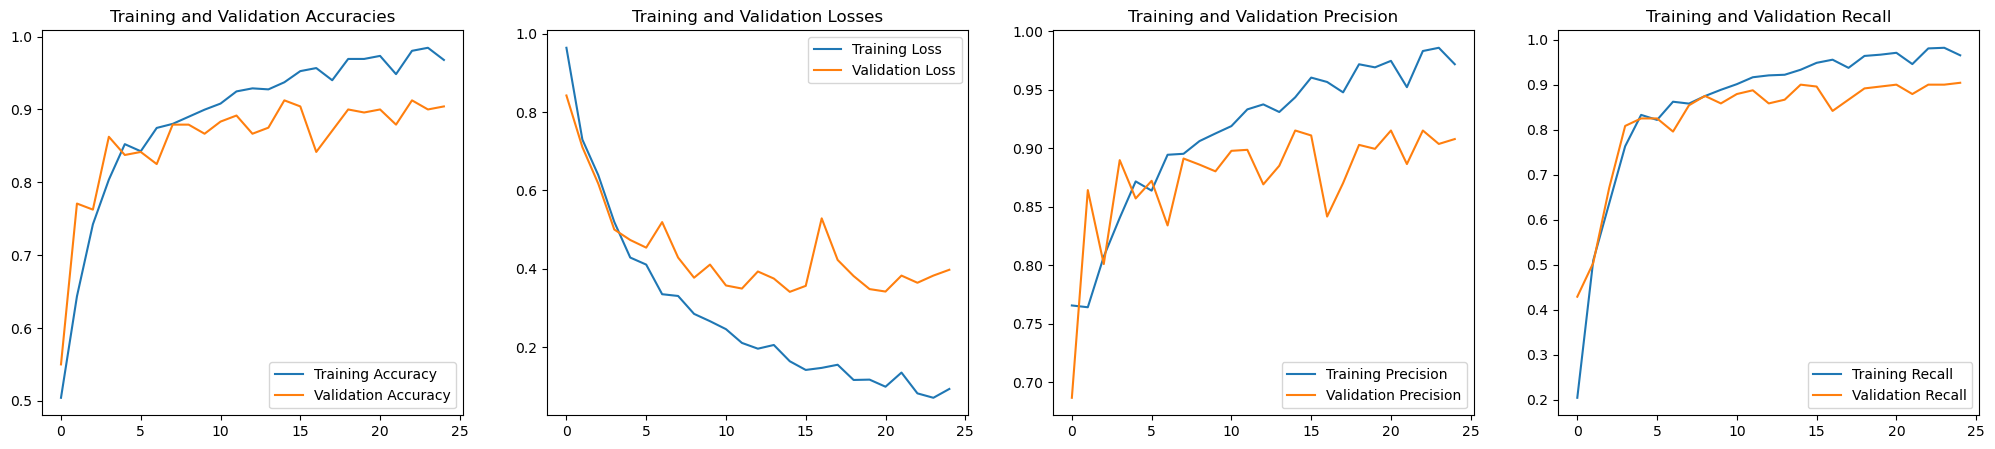

In [36]:
epochs_range = range(len(training_acc))

plt.figure(figsize = (25,5))

plt.subplot(1,4,1)
plt.plot(epochs_range, training_acc, label = 'Training Accuracy')
plt.plot(epochs_range, validation_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracies')

plt.subplot(1, 4, 2)
plt.plot(epochs_range, training_loss, label = 'Training Loss')
plt.plot(epochs_range, validation_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Losses')

plt.subplot(1,4,3)
plt.plot(epochs_range, history_3.history['precision_3'], label = 'Training Precision')
plt.plot(epochs_range, history_3.history['val_precision_3'], label = 'Validation Precision')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Precision')

plt.subplot(1,4,4)
plt.plot(epochs_range, history_3.history['recall_3'], label = 'Training Recall')
plt.plot(epochs_range, history_3.history['val_recall_3'], label = 'Validation Recall')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Recall')

<h4>Let's add few more layers and see the model's performance:</h4>

Let's Change filters and add one more Dense layers and see how it gonna work.

In [40]:
model_fit = Sequential([
    Conv2D(64, (3,3), activation = 'relu', input_shape=training_data.image_shape),
    MaxPooling2D(5 ,5),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(5 ,5),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(5 ,5),
    Flatten(),    
    Dense(128, activation = 'relu'), 
    Dense(64, activation = 'relu'), 
    Dense(32, activation = 'relu'),
    Dense(3, activation = 'softmax')
    ])

In [41]:
model_fit.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 9, 9, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 1, 1, 32)        

In [42]:
model_fit.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [43]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    './weights/best_model4.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1
)

In [44]:
history_fit = model_fit.fit(
    training_data,
    epochs=50,
    validation_data=validation_data,
    batch_size = 32,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
72/72 [==============================] - ETA: 0s - loss: 0.9969 - accuracy: 0.4638 - precision_4: 0.7192 - recall_4: 0.1462
Epoch 1: val_loss improved from inf to 0.80150, saving model to ./weights\best_model4.h5
72/72 [==============================] - 86s 1s/step - loss: 0.9969 - accuracy: 0.4638 - precision_4: 0.7192 - recall_4: 0.1462 - val_loss: 0.8015 - val_accuracy: 0.5792 - val_precision_4: 0.6646 - val_recall_4: 0.4542
Epoch 2/50
72/72 [==============================] - ETA: 0s - loss: 0.7035 - accuracy: 0.7201 - precision_4: 0.7616 - recall_4: 0.5919
Epoch 2: val_loss improved from 0.80150 to 0.54953, saving model to ./weights\best_model4.h5
72/72 [==============================] - 45s 615ms/step - loss: 0.7035 - accuracy: 0.7201 - precision_4: 0.7616 - recall_4: 0.5919 - val_loss: 0.5495 - val_accuracy: 0.7958 - val_precision_4: 0.8356 - val_recall_4: 0.7625
Epoch 3/50
72/72 [==============================] - ETA: 0s - loss: 0.4938 - accuracy: 0.8092 - precision_4

72/72 [==============================] - 37s 521ms/step - loss: 0.0054 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000 - val_loss: 0.3262 - val_accuracy: 0.9167 - val_precision_4: 0.9167 - val_recall_4: 0.9167
Epoch 21/50
72/72 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000
Epoch 21: val_loss did not improve from 0.26700
72/72 [==============================] - 38s 529ms/step - loss: 0.0018 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000 - val_loss: 0.3453 - val_accuracy: 0.9167 - val_precision_4: 0.9205 - val_recall_4: 0.9167
Epoch 22/50
72/72 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000Restoring model weights from the end of the best epoch: 12.

Epoch 22: val_loss did not improve from 0.26700
72/72 [==============================] - 38s 524ms/step - loss: 0.0011 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.00

In [46]:
training_acc = history_fit.history['accuracy']
validation_acc = history_fit.history['val_accuracy']
training_loss = history_fit.history['loss']
validation_loss = history_fit.history['val_loss']
Train_Precision = history_fit.history['precision_4'][-1]
Validation_prec = history_fit.history['val_precision_4'][-1]
Train_Recall = history_fit.history['recall_4'][-1]
Validation_Rec = history_fit.history['val_recall_4'][-1]

print(f'Validation_Accuracy is {validation_acc[-1]:.2f}')
print(f'Validation_Loss is {validation_loss[-1]:.2f}')
print(f'Validation_Precision is {Validation_prec:.2f}')
print(f'Validation_recall is {Validation_Rec:.2f}')

Validation_Accuracy is 0.92
Validation_Loss is 0.36
Validation_Precision is 0.92
Validation_recall is 0.92


Text(0.5, 1.0, 'Training and Validation Recall')

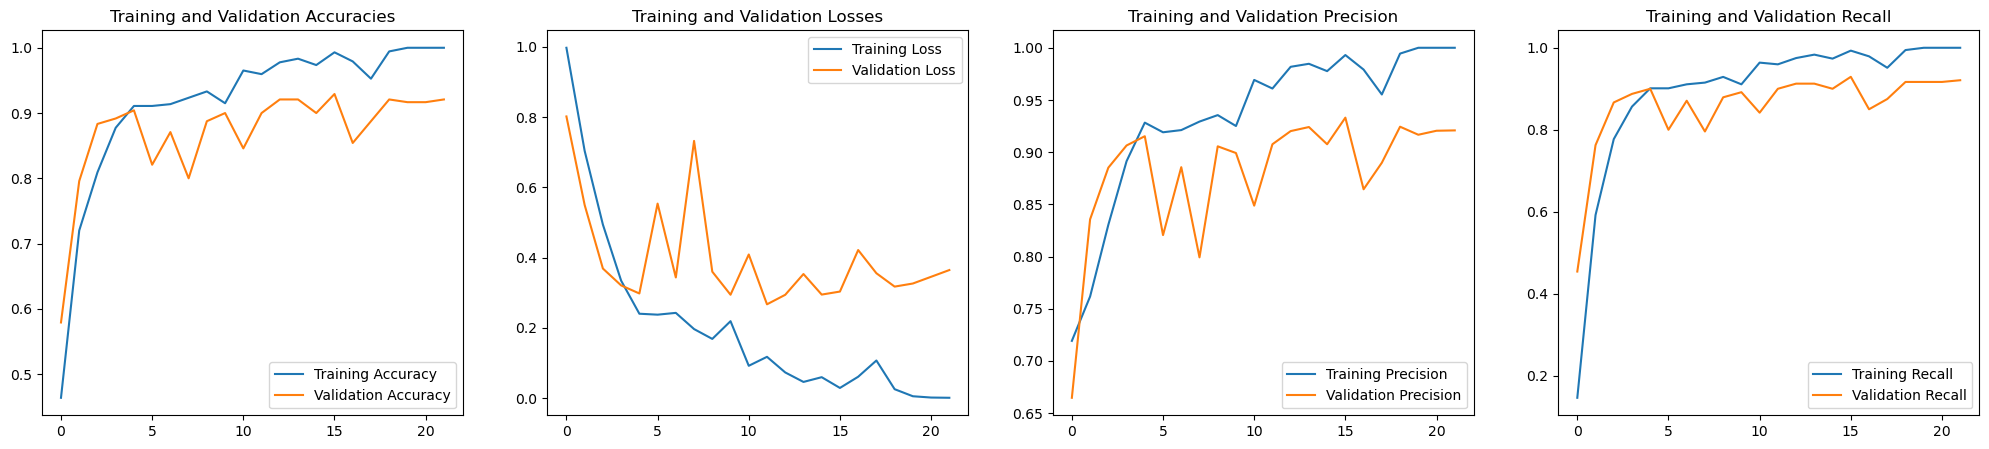

In [48]:
epochs_range = range(len(training_acc))

plt.figure(figsize = (25,5))

plt.subplot(1,4,1)
plt.plot(epochs_range, training_acc, label = 'Training Accuracy')
plt.plot(epochs_range, validation_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracies')

plt.subplot(1, 4, 2)
plt.plot(epochs_range, training_loss, label = 'Training Loss')
plt.plot(epochs_range, validation_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Losses')

plt.subplot(1,4,3)
plt.plot(epochs_range, history_fit.history['precision_4'], label = 'Training Precision')
plt.plot(epochs_range, history_fit.history['val_precision_4'], label = 'Validation Precision')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Precision')

plt.subplot(1,4,4)
plt.plot(epochs_range, history_fit.history['recall_4'], label = 'Training Recall')
plt.plot(epochs_range, history_fit.history['val_recall_4'], label = 'Validation Recall')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Recall')

In [50]:
test_loss, test_acc, test_precision, test_recall = model_fit.evaluate(test_data)
print(f'Validation_Loss is {test_loss:.2f}')
print(f'Validation_Accuracy is {test_acc:.2f}')
print(f'Validation_Precision is {test_precision:.2f}')
print(f'Validation_recall is {test_recall:.2f}')

24/24 [==============================] - 9s 392ms/step - loss: 0.2293 - accuracy: 0.9167 - precision_4: 0.9244 - recall_4: 0.9167
Validation_Loss is 0.23
Validation_Accuracy is 0.92
Validation_Precision is 0.92
Validation_recall is 0.92


In [51]:
test_loss, test_acc, test_precision, test_recall = model_1.evaluate(test_data)
print(f'Validation_Loss is {test_loss:.2f}')
print(f'Validation_Accuracy is {test_acc:.2f}')
print(f'Validation_Precision is {test_precision:.2f}')
print(f'Validation_recall is {test_recall:.2f}')

24/24 [==============================] - 4s 178ms/step - loss: 0.2784 - accuracy: 0.8875 - precision_1: 0.9017 - recall_1: 0.8792
Validation_Loss is 0.28
Validation_Accuracy is 0.89
Validation_Precision is 0.90
Validation_recall is 0.88


Even though our first model giving slight better results than our final model, but it is not giving best results on testing data. Out final model yielding better results on testing data.